In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors

In [16]:
import os
from pathlib import Path
from solution import parse_maps

inp = Path(os.path.abspath("input.txt")).read_text()
maps = parse_maps(inp)

In [24]:
from solution import Map, Range, RangeMap

X_RANGE = Range(start=0, length=int(4.35e9))


def plot_map(map: Map, ax):
    # x_range = Range(0, max(rm.source_start + rm.length for rm in map.range_maps))
    x_range = X_RANGE
    ranges = map.apply_to_range(x_range)
    current_start = x_range.start
    for r, is_processed in ranges:
        ax.plot(
            [current_start, current_start + r.length],
            [r.start, r.start + r.length],
            color="red" if is_processed else "blue",
        )
        current_start += r.length
    try:
        x_label, y_label = map.name.split("-to-")
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
    except Exception:
        pass

    ax.set_xlim(X_RANGE.start, X_RANGE.start + X_RANGE.length)
    ax.set_ylim(X_RANGE.start, X_RANGE.start + X_RANGE.length)
    ax.set_xticks([])
    ax.set_yticks([])

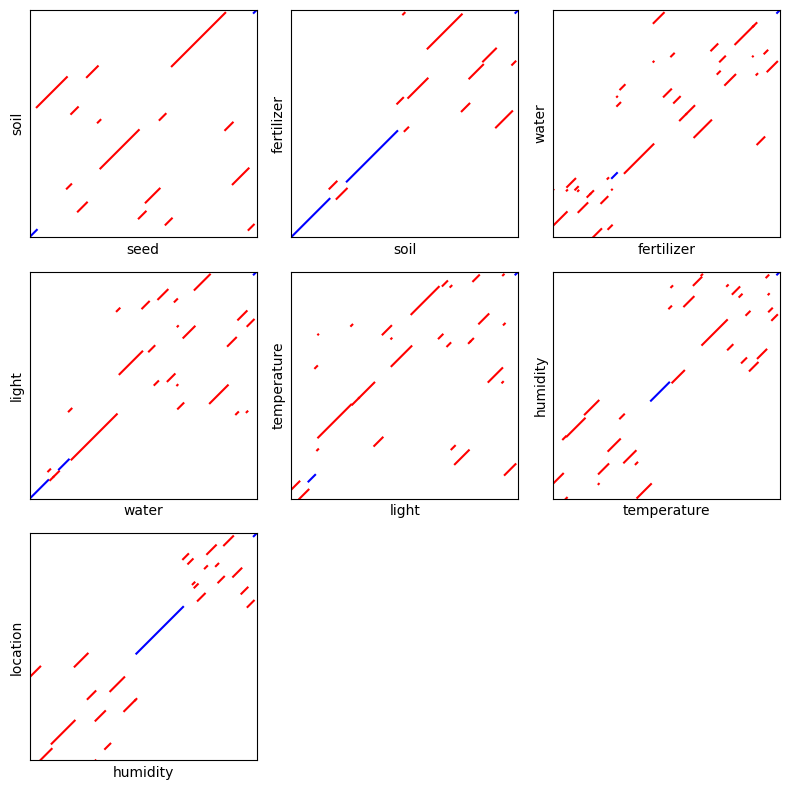

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), squeeze=True)

for idx, map in enumerate(maps):
    plot_map(map, axes[idx // 3, idx % 3])

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])
plt.tight_layout()

In [19]:
ranges = [(X_RANGE, 0)]
for map in maps:
    new_ranges = []
    for range, mapped_count in ranges:
        for subrange, is_mapped in map.apply_to_range(range):
            new_ranges.append((subrange, mapped_count + int(is_mapped)))
    ranges = new_ranges

Text(0, 0.5, '# of mappings')

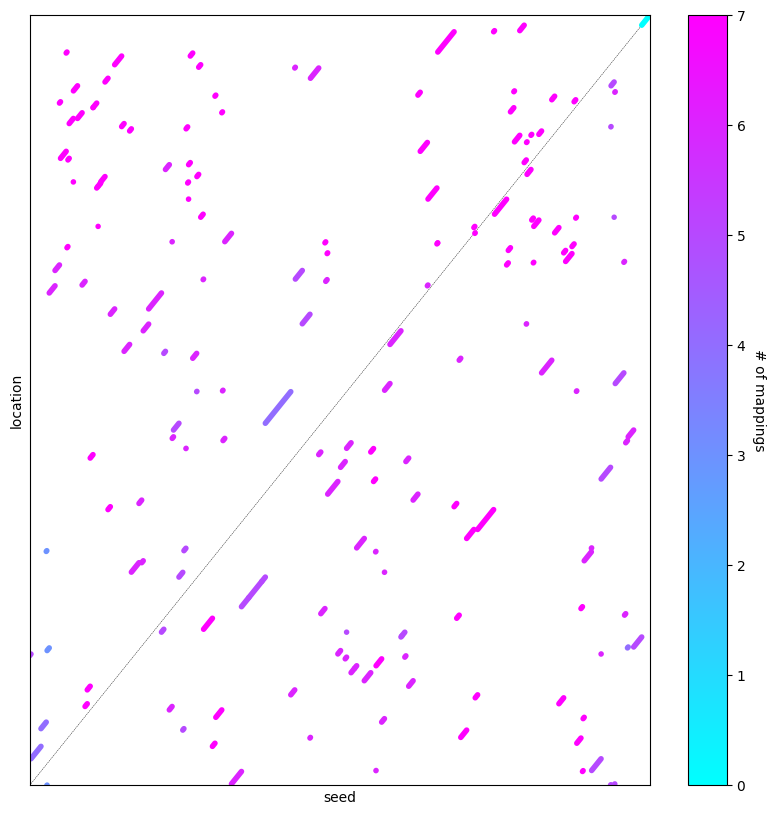

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(*[[X_RANGE.start, X_RANGE.end]] * 2, color="black", linestyle="--", linewidth=0.3)

colormap = plt.colormaps["cool"]

current_start = X_RANGE.start
for r, mapped_count in ranges:
    ax.plot(
        [current_start, current_start + r.length],
        [r.start, r.end],
        # color="red" if mapped_count else "blue",
        color=colormap(mapped_count / 7),
        linewidth=4,
        solid_capstyle="round",
    )
    current_start += r.length
try:
    x_label, _ = maps[0].name.split("-to-")
    _, y_label = maps[-1].name.split("-to-")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
except Exception:
    pass

ax.set_xlim(X_RANGE.start, X_RANGE.end)
ax.set_ylim(X_RANGE.start, X_RANGE.end)
ax.set_xticks([])
ax.set_yticks([])

cbar = plt.colorbar(
    matplotlib.cm.ScalarMappable(
        matplotlib.colors.Normalize(vmin=0, vmax=7),
        colormap,
    ),
    ax=ax,
)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("# of mappings", rotation=270)